In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform_a = torchvision.transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [3]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)


In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True,transform = transform_a, download=True),
  batch_size=batch_size_train, shuffle=True)

In [5]:
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False,transform = transform_a, download=True),
  batch_size=batch_size_test, shuffle=True)

In [6]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


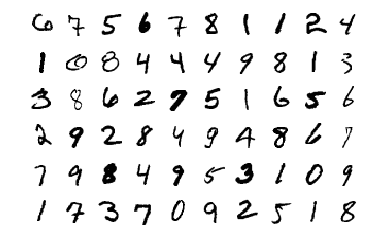

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1,20,5)
        self.conv2 = nn.Conv2d(20,40,5)
        self.fc1 = nn.Linear(16*40,1000)
        self.fc2 = nn.Linear(1000,1000)
        self.fc3 = nn.Linear(1000,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2(x),2))
        x = x.view(-1,16*40)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training = self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x,training = self.training)
        x = self.fc3(x)
        return F.log_softmax(x)

In [10]:
network = Network()
optimizer = optim.SGD(network.parameters(),lr=learning_rate, momentum = momentum)

In [11]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [12]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [13]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average = False).item()
            pred = output.data.max(1,keepdim = True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))
            

In [14]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

F:\SIDDHARTH\SOFTWARE\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
F:\SIDDHARTH\SOFTWARE\soft\Anaconda3\lib\site-packages\torch\nn\_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3036, Accuracy: 937/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301321
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.301404
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.300775
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.292558
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.298725
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.283551
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.278512
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.272686
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.279444
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.265803
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.253951
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.246302
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.247119
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.223910
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.219131
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.213279
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.158916
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.114096
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.040557
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.206746
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.033580
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.189461
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.077273
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.208177
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.122052
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.048861
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.233519
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.303258
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.106373
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.209642
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.101393
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.118488
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.108587
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.150218
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.132874
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.187371
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.069223
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.174053
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.184576


Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.122393
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.108950
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.207493
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.039392
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.091886
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.028803
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.078287
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.075032
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.061923
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.134803
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.031742
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.024696
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.070102
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.041243
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.103829
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.114854
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.040856
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.141205
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.213562
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.091985


Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.089670
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.067897
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.038325
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.047996
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.119209
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.038982
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.072205
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.064829
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.076013
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.147308
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.036460
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.017548
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.029031
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.040988
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.005640
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.053663
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.095608
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.005670
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.035728
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.010777


Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.045221
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.089793
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.022872
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.076284
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.177903

Test set: Avg. loss: 0.0345, Accuracy: 9884/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.016748
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.085436
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.172305
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.046436
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.023327
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.017561
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.061108
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.036400
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.026401
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.066670
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.078327
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.016805
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.010488
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.109059
Train Epoch: 8 [896

Train Epoch: 9 [40960/60000 (68%)]	Loss: 0.040430
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.021941
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.029184
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.017052
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.002745
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.012235
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.016287
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.025757
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.005629
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.034936
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.047850
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.041918
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.002640
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.031170
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.012919
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.034996
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.011705
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.022244
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.028331
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.107058


In [15]:
test()

F:\SIDDHARTH\SOFTWARE\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
F:\SIDDHARTH\SOFTWARE\soft\Anaconda3\lib\site-packages\torch\nn\_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0258, Accuracy: 9917/10000 (99%)

